In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from sklearn.mixture import GaussianMixture

In [2]:
data = pd.read_csv('FinalDataframe_3.csv')

In [3]:
## have to also drop na
data = data.dropna()

In [4]:
data

,Unnamed: 0,Unnamed: 0.1,fips_final,NAME,num_hospitals,num_licensed_beds,num_staffed_beds,num_icu_beds,adult_icu_beds,pedi_icu_beds,...,mob_grocery,mob_parks,mob_transit,mob_workplace,mob_residential,0-17,18-44,45-64,65-74,75+
1,1,1,1003,"Baldwin County, Alabama",4,386,362,51,51,0,...,-5.712121,-3.723232,-14.602020,-23.003030,8.606817,41898,58343,51456,17803,12765
3,3,3,1007,"Bibb County, Alabama",1,35,25,4,4,0,...,-4.359533,3.346264,-6.092929,-22.455556,9.632323,5201,8687,6121,1723,1183
4,4,4,1009,"Blount County, Alabama",1,25,25,6,6,0,...,1.341146,28.599359,-48.302083,-24.653646,9.384231,14106,19416,15361,5079,3360
6,6,6,1013,"Butler County, Alabama",1,72,44,7,7,0,...,-4.057214,39.938053,-12.338889,-19.988235,8.991837,5056,6597,5805,1829,1660
7,7,7,1015,"Calhoun County, Alabama",3,486,435,30,30,0,...,0.208202,4.506024,-13.395833,-18.810748,8.423611,27126,42361,32095,9437,7553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2289,2289,2289,56013,"Fremont County, Wyoming",1,146,133,12,12,0,...,2.583893,-11.000000,0.541667,-16.956693,6.673469,10212,12857,11249,3253,2552
2292,2292,2292,56019,"Johnson County, Wyoming",1,25,22,4,4,0,...,0.773157,38.488789,-7.892308,-19.278571,9.389685,1896,2406,2679,884,704
2293,2293,2293,56021,"Laramie County, Wyoming",1,206,170,15,15,0,...,-3.368484,19.239775,-6.368484,-22.695670,9.661588,22401,32662,25170,6441,5064
2294,2294,2294,56023,"Lincoln County, Wyoming",2,38,35,8,8,0,...,3.476400,-9.852174,-1.841379,-18.962428,5.925373,5104,5646,5115,1372,869


In [5]:
for col in data.columns: 
    print(col) 

Unnamed: 0
Unnamed: 0.1
fips_final
NAME
num_hospitals
num_licensed_beds
num_staffed_beds
num_icu_beds
adult_icu_beds
pedi_icu_beds
potential_increase_in_bed_capac
bed_utilization
avg_ventilator_usage
population
cases_total
deaths_total
cases_per_capita
deaths_per_capita
case_fatality_rate
Unnamed: 0.1.1
county
STATEFP
COUNTYFP
CountyName
StateName
State
dem_to_rep_ratio
stay.at.home
X.50.gatherings
X.500.gatherings
public.schools
restaurant.dine.in
entertainment.gym
federal.guidelines
foreign.travel.ban
Total!!Male
Total!!Female
Total
Total!!Population of one race
Total!!Population of one race!!White
Total!!Population of one race!!Black or African American
Total!!Population of one race!!American Indian and Alaska Native
Total!!Population of one race!!Asian
Total!!Population of one race!!Asian!!Asian Indian
Total!!Population of one race!!Asian!!Chinese (including Taiwanese)
Total!!Population of one race!!Asian!!Filipino
Total!!Population of one race!!Asian!!Japanese
Total!!Population of

# Averaging standardized values for Asians, pac islanders, and other/multiracial

In [6]:
asian = data[['Total!!Population of one race!!Asian',
       'Total!!Population of one race!!Asian!!Asian Indian',
       'Total!!Population of one race!!Asian!!Chinese (including Taiwanese)',
       'Total!!Population of one race!!Asian!!Filipino',
       'Total!!Population of one race!!Asian!!Japanese',
       'Total!!Population of one race!!Asian!!Korean',
       'Total!!Population of one race!!Asian!!Vietnamese',
       'Total!!Population of one race!!Asian!!Other Asian']]
data['All Asian'] = asian.mean(axis=1, skipna=True)
data = data.drop(columns = ['Total!!Population of one race!!Asian',
       'Total!!Population of one race!!Asian!!Asian Indian',
       'Total!!Population of one race!!Asian!!Chinese (including Taiwanese)',
       'Total!!Population of one race!!Asian!!Filipino',
       'Total!!Population of one race!!Asian!!Japanese',
       'Total!!Population of one race!!Asian!!Korean',
       'Total!!Population of one race!!Asian!!Vietnamese',
       'Total!!Population of one race!!Asian!!Other Asian'])

data['Pac Island'] = data[['Total!!Population of one race!!Native Hawaiian and Other Pacific Islander',
       'Total!!Population of one race!!Native Hawaiian and Other Pacific Islander!!Native Hawaiian',
       'Total!!Population of one race!!Native Hawaiian and Other Pacific Islander!!Guamanian or Chamorro',
       'Total!!Population of one race!!Native Hawaiian and Other Pacific Islander!!Samoan',
       'Total!!Population of one race!!Native Hawaiian and Other Pacific Islander!!Other Pacific Islander']].mean(axis=1, skipna=True)
data = data.drop(columns = ['Total!!Population of one race!!Native Hawaiian and Other Pacific Islander',
       'Total!!Population of one race!!Native Hawaiian and Other Pacific Islander!!Native Hawaiian',
       'Total!!Population of one race!!Native Hawaiian and Other Pacific Islander!!Guamanian or Chamorro',
       'Total!!Population of one race!!Native Hawaiian and Other Pacific Islander!!Samoan',
       'Total!!Population of one race!!Native Hawaiian and Other Pacific Islander!!Other Pacific Islander'])

data['Other Race'] = data[['Total!!Population of one race!!Some Other Race',
       'Total!!Population of Two or More Races',
       'Total!!Population of Two or More Races!!White; American Indian and Alaska Native',
       'Total!!Population of Two or More Races!!White; Asian',
       'Total!!Population of Two or More Races!!White; Black or African American',
       'Total!!Population of Two or More Races!!White; Some Other Race']].mean(axis=1, skipna=True)
data = data.drop(columns = ['Total!!Population of one race!!Some Other Race',
       'Total!!Population of Two or More Races',
       'Total!!Population of Two or More Races!!White; American Indian and Alaska Native',
       'Total!!Population of Two or More Races!!White; Asian',
       'Total!!Population of Two or More Races!!White; Black or African American',
       'Total!!Population of Two or More Races!!White; Some Other Race'])

# build per capita 

In [7]:
data['num_hospitals_pt'] = data['num_hospitals'] / data['Total']
data['num_licensed_beds_pt'] = data['num_licensed_beds'] / data['Total']
data['num_staffed_beds_pt'] = data['num_staffed_beds'] / data['Total']
data['num_icu_beds_pt'] = data['num_icu_beds'] / data['Total']
data['adult_icu_beds_pt'] = data['adult_icu_beds'] / data['Total']
data['pedi_icu_beds_pt'] = data['pedi_icu_beds'] / data['Total']
data['potential_increase_in_bed_capac_pt'] = data['potential_increase_in_bed_capac'] / data['Total']
data['bed_utilization_pt'] = data['bed_utilization'] / data['Total']
data['avg_ventilator_usage_pt'] = data['avg_ventilator_usage'] / data['Total']

In [8]:
#for X, or what we're clustering, we are removing outcomes y, such as case and death totals
#Also removing strings; can't k-means cluster on these
#Also removing columns Unnamed, they seem to be artifacts from data cleaning/combining multiple datasets?
X = data.drop(['Unnamed: 0', 'Unnamed: 0.1','NAME',  'cases_total', 'fips_final',
       'deaths_total', 'cases_per_capita', 'deaths_per_capita',
       'case_fatality_rate', 'Unnamed: 0.1.1', 'county', 'population','STATEFP', 'COUNTYFP',
       'CountyName', 'StateName', 'State','num_hospitals', 'num_licensed_beds','num_staffed_beds','num_icu_beds',
        'adult_icu_beds','pedi_icu_beds', 'potential_increase_in_bed_capac','bed_utilization','avg_ventilator_usage',
         'federal.guidelines',   'foreign.travel.ban'  ], axis=1)
y = data[["cases_total", "deaths_total", "cases_per_capita", "deaths_per_capita", "case_fatality_rate"]]

In [9]:
## standardize
X_n = (X - X.mean(axis=0)) / X.std(axis=0)

## K-Means

In [10]:
#set number of clusters
kmeans = KMeans(n_clusters=4, random_state=0).fit(X_n)

#Run the clustering algorithm
model = kmeans.fit(X_n)
model

#Generate cluster predictions and store in y_hat
y_hat = kmeans.predict(X_n)

In [11]:
#function that creates a dataframe with a column for cluster number
cluster_centers = kmeans.cluster_centers_

def kmean_col(X, cluster_centers):
        cols = list(X)
        cols.append('cluster')
        
# Zip with a column called 'cluster' (index)
        Z = [np.append(A, index) for index, A in enumerate(cluster_centers)]
    
# Convert to pandas data frame for plotting
        P = pd.DataFrame(Z, columns=cols)
        P['cluster'] = P['cluster'].astype(int)
        return P
    
P = kmean_col(X_n, cluster_centers)
P

,dem_to_rep_ratio,stay.at.home,X.50.gatherings,X.500.gatherings,public.schools,restaurant.dine.in,entertainment.gym,Total!!Male,Total!!Female,Total,...,num_hospitals_pt,num_licensed_beds_pt,num_staffed_beds_pt,num_icu_beds_pt,adult_icu_beds_pt,pedi_icu_beds_pt,potential_increase_in_bed_capac_pt,bed_utilization_pt,avg_ventilator_usage_pt,cluster
0,-0.190633,0.267673,0.208390,0.245845,0.268537,0.655140,0.353420,-0.295068,-0.289539,-0.292288,...,1.237691,2.081235,2.021097,2.103421,2.103421,1.033935,1.059732,0.946712,0.762858,0
1,0.793816,-0.425788,-0.251734,-0.196916,-0.086360,-0.348080,-0.427665,0.854788,0.864230,0.859734,...,-0.449941,0.089987,0.168886,-0.025500,-0.025500,0.585516,-0.108011,-0.415377,-0.639479,1
2,1.371737,-0.826346,-0.124767,-0.119798,0.373038,-0.318761,-0.552175,5.838073,5.806225,5.822667,...,-0.481377,0.031917,0.148023,0.104698,0.104698,0.852632,-0.204641,-0.493808,-0.903419,2
3,-0.204781,0.090352,0.038959,0.020210,-0.021297,0.009438,0.073703,-0.304179,-0.306573,-0.305446,...,-0.037007,-0.293423,-0.307989,-0.268864,-0.268864,-0.300001,-0.105910,-0.007660,0.081486,3


## EM

In [12]:
## run the EM algorithm (note i have to increase the reg-covar here)
em_k = GaussianMixture(n_components=4, init_params='kmeans', random_state=10, reg_covar = 1e-4).fit(X_n)

In [13]:
#Generate cluster predictions and store in y_hat
y_hat = em_k.predict(X_n)

In [14]:
#combining cluster data with outcome data to look at the whole dataset...
X_n['label_2'] = y_hat # result for EM

X_n['label'] = kmeans.labels_ # result for K-means
whole = pd.concat([X_n, y], axis=1)

In [15]:
whole.columns

Index(['dem_to_rep_ratio', 'stay.at.home', 'X.50.gatherings',
       'X.500.gatherings', 'public.schools', 'restaurant.dine.in',
       'entertainment.gym', 'Total!!Male', 'Total!!Female', 'Total',
       'Total!!Population of one race', 'Total!!Population of one race!!White',
       'Total!!Population of one race!!Black or African American',
       'Total!!Population of one race!!American Indian and Alaska Native',
       'mob_retail', 'mob_grocery', 'mob_parks', 'mob_transit',
       'mob_workplace', 'mob_residential', '0-17', '18-44', '45-64', '65-74',
       '75+', 'All Asian', 'Pac Island', 'Other Race', 'num_hospitals_pt',
       'num_licensed_beds_pt', 'num_staffed_beds_pt', 'num_icu_beds_pt',
       'adult_icu_beds_pt', 'pedi_icu_beds_pt',
       'potential_increase_in_bed_capac_pt', 'bed_utilization_pt',
       'avg_ventilator_usage_pt', 'label_2', 'label', 'cases_total',
       'deaths_total', 'cases_per_capita', 'deaths_per_capita',
       'case_fatality_rate'],
      dtype=

In [16]:
#creates a dataframe with a column for cluster number
b = pd.DataFrame()
for col in X_n.drop(['label_2'],axis=1).columns: 
    a = whole.groupby('label_2', as_index=False).agg({col: "mean"})
    b = pd.concat([b, a], axis=1)

In [17]:
b

,label_2,dem_to_rep_ratio,label_2,stay.at.home,label_2,X.50.gatherings,label_2,X.500.gatherings,label_2,public.schools,...,label_2,pedi_icu_beds_pt,label_2,potential_increase_in_bed_capac_pt,label_2,bed_utilization_pt,label_2,avg_ventilator_usage_pt,label_2,label
0,0,0.603041,0,-0.311832,0,-0.262972,0,-0.142455,0,-0.091408,...,0,0.483712,0,-0.116190,0,-0.405737,0,-0.631225,0,1.660156
1,1,-0.141580,1,0.202555,1,0.125781,1,-0.049642,1,0.201910,...,1,0.665250,1,0.435670,1,0.371271,1,0.243353,1,1.685864
2,2,1.162855,2,-0.819082,2,-0.175407,2,-0.193163,2,0.454316,...,2,0.837052,2,-0.236743,2,-0.494362,2,-0.908957,2,2.000000
3,3,-0.256247,3,0.094561,3,0.081288,3,0.086456,3,-0.038901,...,3,-0.466281,3,-0.088349,3,0.071454,3,0.227872,3,2.893805


In [18]:
## counts_1 is the label result for K-means, counts_2 is the label result for EM
counts_1 = whole['label'].value_counts() # kmeans
counts_2 = whole['label_2'].value_counts() #EM

In [19]:
counts_1

3    732
1    184
0     95
2     16
Name: label, dtype: int64

In [20]:
counts_2

3    565
0    256
1    191
2     15
Name: label_2, dtype: int64

In [21]:
whole

,dem_to_rep_ratio,stay.at.home,X.50.gatherings,X.500.gatherings,public.schools,restaurant.dine.in,entertainment.gym,Total!!Male,Total!!Female,Total,...,potential_increase_in_bed_capac_pt,bed_utilization_pt,avg_ventilator_usage_pt,label_2,label,cases_total,deaths_total,cases_per_capita,deaths_per_capita,case_fatality_rate
1,-0.564591,1.389090,-0.175407,-1.090803,-0.846132,0.169535,1.645564,-0.046878,-0.044805,-0.045827,...,-0.430859,-0.339586,-0.737095,3,3,188,4,0.000842,0.000018,0.021276596
3,-0.539953,1.389090,-0.175407,-1.090803,-0.846132,0.169535,1.645564,-0.460164,-0.469788,-0.465145,...,-0.086634,0.528261,-0.058992,3,3,42,0,0.001876,0.000000,0
4,-0.722049,1.389090,-0.175407,-1.090803,-0.846132,0.169535,1.645564,-0.373842,-0.375230,-0.374605,...,-0.579607,-0.029220,-0.240605,3,3,40,0,0.000692,0.000000,0
6,-0.062311,1.389090,-0.175407,-1.090803,-0.846132,0.169535,1.645564,-0.473402,-0.467236,-0.470323,...,0.930402,-0.016734,1.017112,3,3,114,1,0.005862,0.000051,0.00877193
7,-0.416318,1.389090,-0.175407,-1.090803,-0.846132,0.169535,1.645564,-0.218976,-0.208051,-0.213430,...,-0.093725,-0.308938,-0.089529,3,3,105,3,0.000924,0.000026,0.028571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2289,-0.442881,0.033195,-0.175407,0.359231,1.011650,0.169535,-0.272462,-0.418623,-0.420932,-0.419863,...,-0.213597,-0.332612,0.069859,0,3,128,4,0.003260,0.000102,0.03125
2292,-0.633705,0.033195,-0.175407,0.359231,1.011650,0.169535,-0.272462,-0.502818,-0.502825,-0.502895,...,-0.184118,1.264053,1.457618,3,3,11,1,0.001303,0.000118,0.090909091
2293,-0.354053,0.033195,-0.175407,0.359231,1.011650,0.169535,-0.272462,-0.279715,-0.288110,-0.284042,...,-0.136308,-0.200939,-0.059762,3,3,104,1,0.001045,0.000010,0.009615385
2294,-0.654003,0.033195,-0.175407,0.359231,1.011650,0.169535,-0.272462,-0.476283,-0.479116,-0.477799,...,-0.392435,0.138033,1.328104,3,3,6,0,0.000303,0.000000,0


In [22]:
c = whole[['num_hospitals_pt',
       'num_licensed_beds_pt', 'num_staffed_beds_pt', 'num_icu_beds_pt',
       'adult_icu_beds_pt', 'pedi_icu_beds_pt',
       'potential_increase_in_bed_capac_pt', 'bed_utilization_pt',
       'avg_ventilator_usage_pt']]

In [23]:
whole_2 = pd.concat([whole, c], axis=1)

In [24]:
whole_2

,dem_to_rep_ratio,stay.at.home,X.50.gatherings,X.500.gatherings,public.schools,restaurant.dine.in,entertainment.gym,Total!!Male,Total!!Female,Total,...,case_fatality_rate,num_hospitals_pt,num_licensed_beds_pt,num_staffed_beds_pt,num_icu_beds_pt,adult_icu_beds_pt,pedi_icu_beds_pt,potential_increase_in_bed_capac_pt,bed_utilization_pt,avg_ventilator_usage_pt
1,-0.564591,1.389090,-0.175407,-1.090803,-0.846132,0.169535,1.645564,-0.046878,-0.044805,-0.045827,...,0.021276596,-0.295633,-0.368365,-0.228826,-0.015193,-0.015193,-0.466281,-0.430859,-0.339586,-0.737095
3,-0.539953,1.389090,-0.175407,-1.090803,-0.846132,0.169535,1.645564,-0.460164,-0.469788,-0.465145,...,0,0.152923,-0.653126,-0.764545,-0.489232,-0.489232,-0.466281,-0.086634,0.528261,-0.058992
4,-0.722049,1.389090,-0.175407,-1.090803,-0.846132,0.169535,1.645564,-0.373842,-0.375230,-0.374605,...,0,-0.388696,-1.179445,-1.156463,-0.803982,-0.803982,-0.466281,-0.579607,-0.029220,-0.240605
6,-0.062311,1.389090,-0.175407,-1.090803,-0.846132,0.169535,1.645564,-0.473402,-0.467236,-0.470323,...,0.00877193,0.237699,0.268017,-0.160348,0.229650,0.229650,-0.466281,0.930402,-0.016734,1.017112
7,-0.416318,1.389090,-0.175407,-1.090803,-0.846132,0.169535,1.645564,-0.218976,-0.208051,-0.213430,...,0.028571429,-0.226262,0.587078,0.778140,-0.135901,-0.135901,-0.466281,-0.093725,-0.308938,-0.089529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2289,-0.442881,0.033195,-0.175407,0.359231,1.011650,0.169535,-0.272462,-0.418623,-0.420932,-0.419863,...,0.03125,-0.234072,0.365233,0.566368,0.071585,0.071585,-0.466281,-0.213597,-0.332612,0.069859
2292,-0.633705,0.033195,-0.175407,0.359231,1.011650,0.169535,-0.272462,-0.502818,-0.502825,-0.502895,...,0.090909091,1.663590,0.017336,0.119056,0.826946,0.826946,-0.466281,-0.184118,1.264053,1.457618
2293,-0.354053,0.033195,-0.175407,0.359231,1.011650,0.169535,-0.272462,-0.279715,-0.288110,-0.284042,...,0.009615385,-0.524020,-0.306760,-0.308433,-0.538994,-0.538994,-0.466281,-0.136308,-0.200939,-0.059762
2294,-0.654003,0.033195,-0.175407,0.359231,1.011650,0.169535,-0.272462,-0.476283,-0.479116,-0.477799,...,0,1.534584,-0.377550,-0.260580,0.714549,0.714549,-0.466281,-0.392435,0.138033,1.328104


In [25]:
whole_2.to_csv('FinalDataframe_with_cluster_2.csv')

In [26]:
data = pd.read_csv("FinalDataframe_with_cluster_2.csv")

In [27]:
outcome = data

In [28]:
km_0 = data[data["label"]==0]
km_0

,Unnamed: 0,dem_to_rep_ratio,stay.at.home,X.50.gatherings,X.500.gatherings,public.schools,restaurant.dine.in,entertainment.gym,Total!!Male,Total!!Female,...,case_fatality_rate,num_hospitals_pt.1,num_licensed_beds_pt.1,num_staffed_beds_pt.1,num_icu_beds_pt.1,adult_icu_beds_pt.1,pedi_icu_beds_pt.1,potential_increase_in_bed_capac_pt.1,bed_utilization_pt.1,avg_ventilator_usage_pt.1
10,14,-0.382911,1.389090,-0.175407,-1.090803,-0.846132,0.169535,1.645564,-0.385682,-0.378792,...,0.048780488,0.010381,2.004121,1.881267,0.545034,0.545034,-0.466281,1.143051,-0.250428,0.179296
15,24,-0.495741,1.389090,-0.175407,-1.090803,-0.846132,0.169535,1.645564,-0.254180,-0.247181,...,0.068493151,0.042583,2.023265,1.963767,2.390392,2.390392,-0.466281,1.032168,-0.215839,-0.269155
19,30,-0.471674,1.389090,-0.175407,-1.090803,-0.846132,0.169535,1.645564,-0.264316,-0.252320,...,0.041237113,0.065068,2.143912,2.507679,1.917899,1.917899,1.628830,0.288095,-0.104244,-0.044982
99,229,-0.628672,-0.354204,0.904910,-1.090803,2.404987,0.541571,-0.698690,-0.499512,-0.498398,...,0,3.368285,0.050934,0.370275,1.415280,1.415280,-0.466281,-0.579607,0.510939,0.068597
108,242,0.788353,-0.547903,-0.985645,-0.262212,-0.846132,0.541571,-0.059348,0.117533,0.132914,...,0.017301038,-0.498616,1.523523,1.415997,2.730587,2.730587,4.616571,0.895619,-0.323919,0.433919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,2207,-0.547722,-0.741602,0.904910,1.187821,-0.846132,2.029713,0.793108,-0.366360,-0.356933,...,0,0.246846,1.855855,0.562589,1.111594,1.111594,-0.466281,3.284828,0.019834,-0.075830
983,2209,-0.025439,-0.741602,0.904910,1.187821,-0.846132,2.029713,0.793108,-0.259694,-0.284368,...,0.046728972,-0.104525,3.499024,4.120033,2.985390,2.985390,3.454663,0.418637,-0.111678,2.775796
985,2212,-0.326946,-0.741602,0.904910,1.187821,-0.846132,2.029713,0.793108,-0.412523,-0.404516,...,0.03030303,0.181084,2.896859,1.881752,0.954029,0.954029,-0.466281,3.233081,0.141038,0.903436
1005,2257,-0.152901,-0.547903,-0.985645,-0.262212,0.082759,-0.574536,-0.698690,-0.429572,-0.431694,...,0,0.399375,0.914694,0.278310,2.477932,2.477932,-0.466281,1.617054,0.142430,0.188429


In [29]:
km0_X = km_0.drop(['Unnamed: 0', 'cases_total', 
       'deaths_total', 'cases_per_capita', 'deaths_per_capita',
       'case_fatality_rate', 'num_hospitals_pt',
       'num_licensed_beds_pt', 'num_staffed_beds_pt', 'num_icu_beds_pt',
       'adult_icu_beds_pt', 'pedi_icu_beds_pt',
       'potential_increase_in_bed_capac_pt', 'bed_utilization_pt',
       'avg_ventilator_usage_pt',"label", "label_2"], axis=1)
km0_y = km_0["cases_per_capita"]

In [30]:
km0_y

10      0.000742
15      0.001428
19      0.000916
99      0.000898
108     0.001074
          ...   
982     0.000187
983     0.001013
985     0.000797
1005    0.000169
1018    0.000027
Name: cases_per_capita, Length: 95, dtype: float64

In [31]:
km0_X

,dem_to_rep_ratio,stay.at.home,X.50.gatherings,X.500.gatherings,public.schools,restaurant.dine.in,entertainment.gym,Total!!Male,Total!!Female,Total,...,Other Race,num_hospitals_pt.1,num_licensed_beds_pt.1,num_staffed_beds_pt.1,num_icu_beds_pt.1,adult_icu_beds_pt.1,pedi_icu_beds_pt.1,potential_increase_in_bed_capac_pt.1,bed_utilization_pt.1,avg_ventilator_usage_pt.1
10,-0.382911,1.389090,-0.175407,-1.090803,-0.846132,0.169535,1.645564,-0.385682,-0.378792,-0.382221,...,-0.301313,0.010381,2.004121,1.881267,0.545034,0.545034,-0.466281,1.143051,-0.250428,0.179296
15,-0.495741,1.389090,-0.175407,-1.090803,-0.846132,0.169535,1.645564,-0.254180,-0.247181,-0.250644,...,-0.258165,0.042583,2.023265,1.963767,2.390392,2.390392,-0.466281,1.032168,-0.215839,-0.269155
19,-0.471674,1.389090,-0.175407,-1.090803,-0.846132,0.169535,1.645564,-0.264316,-0.252320,-0.258230,...,-0.265709,0.065068,2.143912,2.507679,1.917899,1.917899,1.628830,0.288095,-0.104244,-0.044982
99,-0.628672,-0.354204,0.904910,-1.090803,2.404987,0.541571,-0.698690,-0.499512,-0.498398,-0.499016,...,-0.315884,3.368285,0.050934,0.370275,1.415280,1.415280,-0.466281,-0.579607,0.510939,0.068597
108,0.788353,-0.547903,-0.985645,-0.262212,-0.846132,0.541571,-0.059348,0.117533,0.132914,0.125403,...,-0.086339,-0.498616,1.523523,1.415997,2.730587,2.730587,4.616571,0.895619,-0.323919,0.433919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,-0.547722,-0.741602,0.904910,1.187821,-0.846132,2.029713,0.793108,-0.366360,-0.356933,-0.361601,...,-0.305993,0.246846,1.855855,0.562589,1.111594,1.111594,-0.466281,3.284828,0.019834,-0.075830
983,-0.025439,-0.741602,0.904910,1.187821,-0.846132,2.029713,0.793108,-0.259694,-0.284368,-0.272330,...,-0.278714,-0.104525,3.499024,4.120033,2.985390,2.985390,3.454663,0.418637,-0.111678,2.775796
985,-0.326946,-0.741602,0.904910,1.187821,-0.846132,2.029713,0.793108,-0.412523,-0.404516,-0.408495,...,-0.307386,0.181084,2.896859,1.881752,0.954029,0.954029,-0.466281,3.233081,0.141038,0.903436
1005,-0.152901,-0.547903,-0.985645,-0.262212,0.082759,-0.574536,-0.698690,-0.429572,-0.431694,-0.430718,...,-0.319264,0.399375,0.914694,0.278310,2.477932,2.477932,-0.466281,1.617054,0.142430,0.188429


In [32]:
from sklearn.model_selection import train_test_split
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(km0_X, km0_y, test_size=0.33, random_state=66)

In [33]:
import matplotlib.pyplot as plt

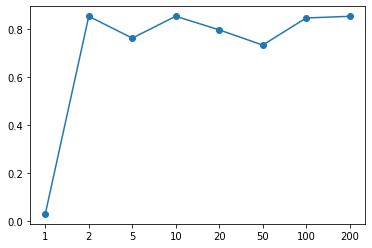

In [34]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(263)
Bs = [1, 2, 5, 10, 20, 50, 100, 200]
Rsqs = []
for B in Bs:
    regressor1 = RandomForestRegressor(n_estimators=B, max_depth=10)
    regressor1.fit(X_train, y_train)
    Rsqs.append(regressor1.score(X_train, y_train))
# Make the plot
plt.plot(list(map(str, Bs)), Rsqs, "-o")
plt.show()

In [35]:
max_Rsq = max(Rsqs)
max_index = Rsqs.index(max_Rsq)
max_index
B = Bs[max_index]
B

10

In [36]:
regressor1 = RandomForestRegressor(n_estimators=B, max_depth=10)
regressor1.fit(X_train, y_train)
preds = regressor1.predict(X_test)

In [37]:
feature_list = list(km0_X.columns)
# Get numerical feature importances
importances = list(regressor1.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: num_hospitals_pt.1   Importance: 0.48
Variable: dem_to_rep_ratio     Importance: 0.09
Variable: mob_grocery          Importance: 0.09
Variable: Other Race           Importance: 0.09
Variable: Total!!Population of one race!!Black or African American Importance: 0.07
Variable: Total!!Population of one race!!American Indian and Alaska Native Importance: 0.03
Variable: mob_parks            Importance: 0.02
Variable: Pac Island           Importance: 0.02
Variable: restaurant.dine.in   Importance: 0.01
Variable: Total!!Male          Importance: 0.01
Variable: mob_retail           Importance: 0.01
Variable: mob_transit          Importance: 0.01
Variable: 0-17                 Importance: 0.01
Variable: 75+                  Importance: 0.01
Variable: num_licensed_beds_pt.1 Importance: 0.01
Variable: num_icu_beds_pt.1    Importance: 0.01
Variable: adult_icu_beds_pt.1  Importance: 0.01
Variable: potential_increase_in_bed_capac_pt.1 Importance: 0.01
Variable: stay.at.home         Importa

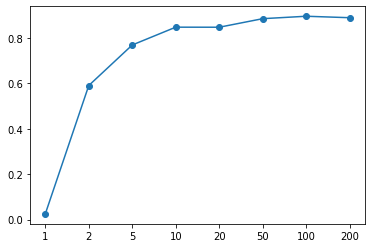


max R squared: 0.8954999308024774
Variable: mob_residential      Importance: 0.16
Variable: stay.at.home         Importance: 0.07
Variable: mob_grocery          Importance: 0.06
Variable: num_hospitals_pt.1   Importance: 0.06
Variable: X.50.gatherings      Importance: 0.05
Variable: mob_transit          Importance: 0.05
Variable: entertainment.gym    Importance: 0.04
Variable: num_icu_beds_pt.1    Importance: 0.04
Variable: adult_icu_beds_pt.1  Importance: 0.04
Variable: potential_increase_in_bed_capac_pt.1 Importance: 0.04
Variable: Total!!Population of one race!!American Indian and Alaska Native Importance: 0.03
Variable: 75+                  Importance: 0.03
Variable: pedi_icu_beds_pt.1   Importance: 0.03
Variable: dem_to_rep_ratio     Importance: 0.02
Variable: X.500.gatherings     Importance: 0.02
Variable: Total!!Population of one race!!Black or African American Importance: 0.02
Variable: mob_retail           Importance: 0.02
Variable: mob_parks            Importance: 0.02
Varia

In [38]:
km_1 = data[data["label"]==1]
km1_X = km_1.drop(['Unnamed: 0', 'cases_total', 
       'deaths_total', 'cases_per_capita', 'deaths_per_capita',
       'case_fatality_rate', 'num_hospitals_pt',
       'num_licensed_beds_pt', 'num_staffed_beds_pt', 'num_icu_beds_pt',
       'adult_icu_beds_pt', 'pedi_icu_beds_pt',
       'potential_increase_in_bed_capac_pt', 'bed_utilization_pt',
       'avg_ventilator_usage_pt',"label", "label_2"], axis=1)
km1_y = km_1["cases_per_capita"]
X_train, X_test, y_train, y_test = train_test_split(km1_X, km1_y, test_size=0.33, random_state=66)
np.random.seed(263)
Bs = [1, 2, 5, 10, 20, 50, 100, 200]
Rsqs = []
for B in Bs:
    regressor2 = RandomForestRegressor(n_estimators=B, max_depth=10)
    regressor2.fit(X_train, y_train)
    Rsqs.append(regressor2.score(X_train, y_train))
# Make the plot
plt.plot(list(map(str, Bs)), Rsqs, "-o")
plt.show()
max_Rsq = max(Rsqs)
max_index = Rsqs.index(max_Rsq)
print("\nmax R squared:", max_Rsq)
B = Bs[max_index]
B
regressor2 = RandomForestRegressor(n_estimators=B, max_depth=10)
regressor2.fit(X_train, y_train)
preds = regressor2.predict(X_test)
feature_list = list(km1_X.columns)
# Get numerical feature importances
importances = list(regressor2.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

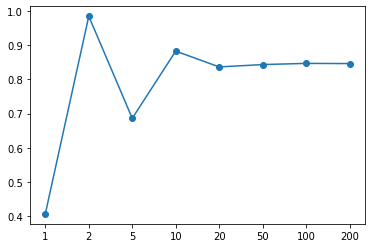


max R squared: 0.9838917386025848
Variable: dem_to_rep_ratio     Importance: 0.49
Variable: stay.at.home         Importance: 0.49
Variable: Total!!Male          Importance: 0.01
Variable: Total                Importance: 0.01
Variable: Pac Island           Importance: 0.01
Variable: X.50.gatherings      Importance: 0.0
Variable: X.500.gatherings     Importance: 0.0
Variable: public.schools       Importance: 0.0
Variable: restaurant.dine.in   Importance: 0.0
Variable: entertainment.gym    Importance: 0.0
Variable: Total!!Female        Importance: 0.0
Variable: Total!!Population of one race Importance: 0.0
Variable: Total!!Population of one race!!White Importance: 0.0
Variable: Total!!Population of one race!!Black or African American Importance: 0.0
Variable: Total!!Population of one race!!American Indian and Alaska Native Importance: 0.0
Variable: mob_retail           Importance: 0.0
Variable: mob_grocery          Importance: 0.0
Variable: mob_parks            Importance: 0.0
Variable:

In [39]:
km_2 = data[data["label"]==2]
km2_X = km_2.drop(['Unnamed: 0', 'cases_total', 
       'deaths_total', 'cases_per_capita', 'deaths_per_capita',
       'case_fatality_rate', 'num_hospitals_pt',
       'num_licensed_beds_pt', 'num_staffed_beds_pt', 'num_icu_beds_pt',
       'adult_icu_beds_pt', 'pedi_icu_beds_pt',
       'potential_increase_in_bed_capac_pt', 'bed_utilization_pt',
       'avg_ventilator_usage_pt',"label", "label_2"], axis=1)
km2_y = km_2["cases_per_capita"]
X_train, X_test, y_train, y_test = train_test_split(km2_X, km2_y, test_size=0.33, random_state=66)
np.random.seed(263)
Bs = [1, 2, 5, 10, 20, 50, 100, 200]
Rsqs = []
for B in Bs:
    regressor3 = RandomForestRegressor(n_estimators=B, max_depth=10)
    regressor3.fit(X_train, y_train)
    Rsqs.append(regressor3.score(X_train, y_train))
# Make the plot
plt.plot(list(map(str, Bs)), Rsqs, "-o")
plt.show()
max_Rsq = max(Rsqs)
max_index = Rsqs.index(max_Rsq)
print("\nmax R squared:", max_Rsq)
B = Bs[max_index]
B
regressor3 = RandomForestRegressor(n_estimators=B, max_depth=10)
regressor3.fit(X_train, y_train)
preds = regressor3.predict(X_test)
feature_list = list(km2_X.columns)
# Get numerical feature importances
importances = list(regressor3.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

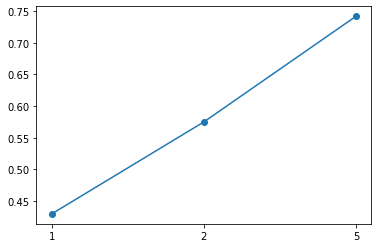


max R squared: 0.7419134367970563
Variable: X.500.gatherings     Importance: 0.14
Variable: Total!!Population of one race!!Black or African American Importance: 0.14
Variable: 18-44                Importance: 0.13
Variable: num_hospitals_pt.1   Importance: 0.09
Variable: 75+                  Importance: 0.08
Variable: num_staffed_beds_pt.1 Importance: 0.07
Variable: dem_to_rep_ratio     Importance: 0.03
Variable: restaurant.dine.in   Importance: 0.03
Variable: Total!!Population of one race!!American Indian and Alaska Native Importance: 0.03
Variable: mob_residential      Importance: 0.03
Variable: avg_ventilator_usage_pt.1 Importance: 0.03
Variable: stay.at.home         Importance: 0.02
Variable: mob_grocery          Importance: 0.02
Variable: potential_increase_in_bed_capac_pt.1 Importance: 0.02
Variable: X.50.gatherings      Importance: 0.01
Variable: entertainment.gym    Importance: 0.01
Variable: mob_parks            Importance: 0.01
Variable: mob_transit          Importance: 0.01

In [40]:
km_3 = data[data["label"]==3]
km3_X = km_3.drop(['Unnamed: 0', 'cases_total', 
       'deaths_total', 'cases_per_capita', 'deaths_per_capita',
       'case_fatality_rate', 'num_hospitals_pt',
       'num_licensed_beds_pt', 'num_staffed_beds_pt', 'num_icu_beds_pt',
       'adult_icu_beds_pt', 'pedi_icu_beds_pt',
       'potential_increase_in_bed_capac_pt', 'bed_utilization_pt',
       'avg_ventilator_usage_pt',"label", "label_2"], axis=1)
km3_y = km_3["cases_per_capita"]
X_train, X_test, y_train, y_test = train_test_split(km3_X, km3_y, test_size=0.33, random_state=66)
np.random.seed(263)
Bs = [1, 2, 5]
Rsqs = []
for B in Bs:
    regressor4 = RandomForestRegressor(n_estimators=B, max_depth=10)
    regressor4.fit(X_train, y_train)
    Rsqs.append(regressor4.score(X_train, y_train))
# Make the plot
plt.plot(list(map(str, Bs)), Rsqs, "-o")
plt.show()
max_Rsq = max(Rsqs)
max_index = Rsqs.index(max_Rsq)
print("\nmax R squared:", max_Rsq)
B = Bs[max_index]
B
regressor4 = RandomForestRegressor(n_estimators=B, max_depth=10)
regressor4.fit(X_train, y_train)
preds = regressor4.predict(X_test)
feature_list = list(km3_X.columns)
# Get numerical feature importances
importances = list(regressor4.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

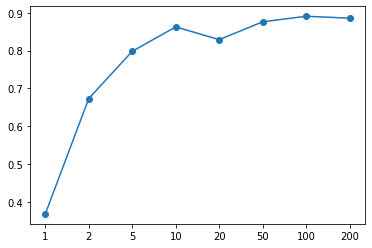


max R squared: 0.8907099569718975
Variable: Total!!Population of one race!!Black or African American Importance: 0.09
Variable: All Asian            Importance: 0.09
Variable: dem_to_rep_ratio     Importance: 0.08
Variable: X.50.gatherings      Importance: 0.06
Variable: Other Race           Importance: 0.06
Variable: num_hospitals_pt.1   Importance: 0.05
Variable: entertainment.gym    Importance: 0.04
Variable: Pac Island           Importance: 0.04
Variable: avg_ventilator_usage_pt.1 Importance: 0.04
Variable: stay.at.home         Importance: 0.03
Variable: Total!!Population of one race!!American Indian and Alaska Native Importance: 0.03
Variable: mob_retail           Importance: 0.03
Variable: mob_parks            Importance: 0.03
Variable: 75+                  Importance: 0.03
Variable: potential_increase_in_bed_capac_pt.1 Importance: 0.03
Variable: Total!!Female        Importance: 0.02
Variable: Total!!Population of one race!!White Importance: 0.02
Variable: mob_workplace        I

In [41]:
full_X = data.drop(['Unnamed: 0', 'cases_total', 
       'deaths_total', 'cases_per_capita', 'deaths_per_capita',
       'case_fatality_rate', 'num_hospitals_pt',
       'num_licensed_beds_pt', 'num_staffed_beds_pt', 'num_icu_beds_pt',
       'adult_icu_beds_pt', 'pedi_icu_beds_pt',
       'potential_increase_in_bed_capac_pt', 'bed_utilization_pt',
       'avg_ventilator_usage_pt',"label", "label_2"], axis=1)
full_y = data["cases_per_capita"]
X_train, X_test, y_train, y_test = train_test_split(full_X, full_y, test_size=0.33, random_state=66)
np.random.seed(263)
Bs = [1, 2, 5, 10, 20, 50, 100, 200]
Rsqs = []
for B in Bs:
    regressor5 = RandomForestRegressor(n_estimators=B, max_depth=10)
    regressor5.fit(X_train, y_train)
    Rsqs.append(regressor5.score(X_train, y_train))
# Make the plot
plt.plot(list(map(str, Bs)), Rsqs, "-o")
plt.show()
max_Rsq = max(Rsqs)
max_index = Rsqs.index(max_Rsq)
print("\nmax R squared:", max_Rsq)
B = Bs[max_index]
B
regressor5 = RandomForestRegressor(n_estimators=B, max_depth=10)
regressor5.fit(X_train, y_train)
preds = regressor5.predict(X_test)
feature_list = list(full_X.columns)
# Get numerical feature importances
importances = list(regressor5.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

In [42]:
kmeans0 = data[data["label"]==0]
kmeans0.columns

Index(['Unnamed: 0', 'dem_to_rep_ratio', 'stay.at.home', 'X.50.gatherings',
       'X.500.gatherings', 'public.schools', 'restaurant.dine.in',
       'entertainment.gym', 'Total!!Male', 'Total!!Female', 'Total',
       'Total!!Population of one race', 'Total!!Population of one race!!White',
       'Total!!Population of one race!!Black or African American',
       'Total!!Population of one race!!American Indian and Alaska Native',
       'mob_retail', 'mob_grocery', 'mob_parks', 'mob_transit',
       'mob_workplace', 'mob_residential', '0-17', '18-44', '45-64', '65-74',
       '75+', 'All Asian', 'Pac Island', 'Other Race', 'num_hospitals_pt',
       'num_licensed_beds_pt', 'num_staffed_beds_pt', 'num_icu_beds_pt',
       'adult_icu_beds_pt', 'pedi_icu_beds_pt',
       'potential_increase_in_bed_capac_pt', 'bed_utilization_pt',
       'avg_ventilator_usage_pt', 'label_2', 'label', 'cases_total',
       'deaths_total', 'cases_per_capita', 'deaths_per_capita',
       'case_fatality_rate',

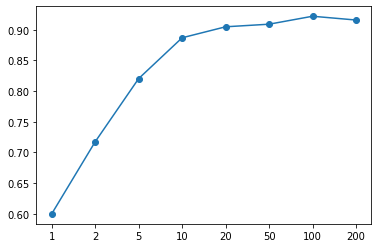


max R squared: 0.9218954287857214
Variable: All Asian            Importance: 0.15
Variable: stay.at.home         Importance: 0.12
Variable: Other Race           Importance: 0.09
Variable: X.50.gatherings      Importance: 0.08
Variable: mob_residential      Importance: 0.08
Variable: Total!!Population of one race!!Black or African American Importance: 0.05
Variable: dem_to_rep_ratio     Importance: 0.03
Variable: Pac Island           Importance: 0.03
Variable: pedi_icu_beds_pt.1   Importance: 0.03
Variable: entertainment.gym    Importance: 0.02
Variable: Total!!Population of one race!!White Importance: 0.02
Variable: Total!!Population of one race!!American Indian and Alaska Native Importance: 0.02
Variable: mob_retail           Importance: 0.02
Variable: mob_workplace        Importance: 0.02
Variable: 75+                  Importance: 0.02
Variable: potential_increase_in_bed_capac_pt.1 Importance: 0.02
Variable: X.500.gatherings     Importance: 0.01
Variable: public.schools       Import

In [43]:
em_0 = data[data["label_2"]==0]
em0_X = em_0.drop(['Unnamed: 0', 'cases_total', 
       'deaths_total', 'cases_per_capita', 'deaths_per_capita',
       'case_fatality_rate', 'num_hospitals_pt',
       'num_licensed_beds_pt', 'num_staffed_beds_pt', 'num_icu_beds_pt',
       'adult_icu_beds_pt', 'pedi_icu_beds_pt',
       'potential_increase_in_bed_capac_pt', 'bed_utilization_pt',
       'avg_ventilator_usage_pt',"label", "label_2"], axis=1)
em0_y = em_0["cases_per_capita"]
X_train, X_test, y_train, y_test = train_test_split(em0_X, em0_y, test_size=0.33, random_state=66)
np.random.seed(263)
Bs = [1, 2, 5, 10, 20, 50, 100, 200]
Rsqs = []
for B in Bs:
    regressor1 = RandomForestRegressor(n_estimators=B, max_depth=10)
    regressor1.fit(X_train, y_train)
    Rsqs.append(regressor1.score(X_train, y_train))
# Make the plot
plt.plot(list(map(str, Bs)), Rsqs, "-o")
plt.show()
max_Rsq = max(Rsqs)
max_index = Rsqs.index(max_Rsq)
print("\nmax R squared:", max_Rsq)
B = Bs[max_index]
B
regressor1 = RandomForestRegressor(n_estimators=B, max_depth=10)
regressor1.fit(X_train, y_train)
preds = regressor1.predict(X_test)
feature_list = list(em0_X.columns)
# Get numerical feature importances
importances = list(regressor1.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

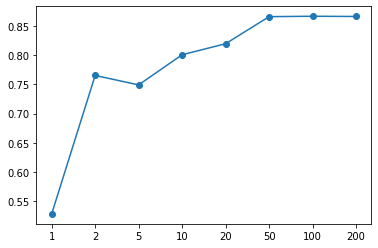


max R squared: 0.8662085894126106
Variable: Total!!Population of one race!!Black or African American Importance: 0.13
Variable: Other Race           Importance: 0.13
Variable: mob_workplace        Importance: 0.06
Variable: mob_retail           Importance: 0.05
Variable: mob_residential      Importance: 0.05
Variable: dem_to_rep_ratio     Importance: 0.04
Variable: X.50.gatherings      Importance: 0.04
Variable: entertainment.gym    Importance: 0.04
Variable: mob_grocery          Importance: 0.03
Variable: mob_transit          Importance: 0.03
Variable: Pac Island           Importance: 0.03
Variable: num_hospitals_pt.1   Importance: 0.03
Variable: avg_ventilator_usage_pt.1 Importance: 0.03
Variable: stay.at.home         Importance: 0.02
Variable: X.500.gatherings     Importance: 0.02
Variable: restaurant.dine.in   Importance: 0.02
Variable: Total!!Population of one race!!White Importance: 0.02
Variable: Total!!Population of one race!!American Indian and Alaska Native Importance: 0.02


In [44]:
em_1 = data[data["label_2"]==1]
em1_X = em_1.drop(['Unnamed: 0', 'cases_total', 
       'deaths_total', 'cases_per_capita', 'deaths_per_capita',
       'case_fatality_rate', 'num_hospitals_pt',
       'num_licensed_beds_pt', 'num_staffed_beds_pt', 'num_icu_beds_pt',
       'adult_icu_beds_pt', 'pedi_icu_beds_pt',
       'potential_increase_in_bed_capac_pt', 'bed_utilization_pt',
       'avg_ventilator_usage_pt',"label", "label_2"], axis=1)
em1_y = em_1["cases_per_capita"]
X_train, X_test, y_train, y_test = train_test_split(em1_X, em1_y, test_size=0.33, random_state=66)
np.random.seed(263)
Bs = [1, 2, 5, 10, 20, 50, 100, 200]
Rsqs = []
for B in Bs:
    regressor2 = RandomForestRegressor(n_estimators=B, max_depth=10)
    regressor2.fit(X_train, y_train)
    Rsqs.append(regressor2.score(X_train, y_train))
# Make the plot
plt.plot(list(map(str, Bs)), Rsqs, "-o")
plt.show()
max_Rsq = max(Rsqs)
max_index = Rsqs.index(max_Rsq)
print("\nmax R squared:", max_Rsq)
B = Bs[max_index]
B
regressor2 = RandomForestRegressor(n_estimators=B, max_depth=10)
regressor2.fit(X_train, y_train)
preds = regressor2.predict(X_test)
feature_list = list(em1_X.columns)
# Get numerical feature importances
importances = list(regressor2.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

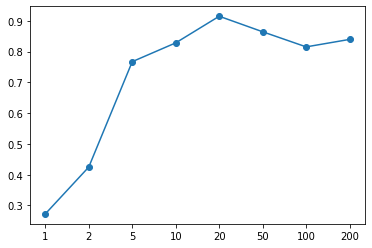


max R squared: 0.9149066181517218
Variable: dem_to_rep_ratio     Importance: 0.14
Variable: potential_increase_in_bed_capac_pt.1 Importance: 0.1
Variable: Total!!Population of one race!!Black or African American Importance: 0.09
Variable: Pac Island           Importance: 0.08
Variable: X.50.gatherings      Importance: 0.05
Variable: Total!!Male          Importance: 0.05
Variable: Total!!Female        Importance: 0.05
Variable: Total                Importance: 0.05
Variable: Total!!Population of one race!!White Importance: 0.05
Variable: Total!!Population of one race!!American Indian and Alaska Native Importance: 0.05
Variable: mob_transit          Importance: 0.05
Variable: 65-74                Importance: 0.05
Variable: 75+                  Importance: 0.05
Variable: bed_utilization_pt.1 Importance: 0.05
Variable: public.schools       Importance: 0.04
Variable: entertainment.gym    Importance: 0.03
Variable: mob_workplace        Importance: 0.01
Variable: 0-17                 Importa

In [45]:
em_2 = data[data["label_2"]==2]
em2_X = em_2.drop(['Unnamed: 0', 'cases_total', 
       'deaths_total', 'cases_per_capita', 'deaths_per_capita',
       'case_fatality_rate', 'num_hospitals_pt',
       'num_licensed_beds_pt', 'num_staffed_beds_pt', 'num_icu_beds_pt',
       'adult_icu_beds_pt', 'pedi_icu_beds_pt',
       'potential_increase_in_bed_capac_pt', 'bed_utilization_pt',
       'avg_ventilator_usage_pt',"label", "label_2"], axis=1)
em2_y = em_2["cases_per_capita"]
X_train, X_test, y_train, y_test = train_test_split(em2_X, em2_y, test_size=0.33, random_state=66)
np.random.seed(263)
Bs = [1, 2, 5, 10, 20, 50, 100, 200]
Rsqs = []
for B in Bs:
    regressor3 = RandomForestRegressor(n_estimators=B, max_depth=10)
    regressor3.fit(X_train, y_train)
    Rsqs.append(regressor3.score(X_train, y_train))
# Make the plot
plt.plot(list(map(str, Bs)), Rsqs, "-o")
plt.show()
max_Rsq = max(Rsqs)
max_index = Rsqs.index(max_Rsq)
print("\nmax R squared:", max_Rsq)
B = Bs[max_index]
B
regressor3 = RandomForestRegressor(n_estimators=B, max_depth=10)
regressor3.fit(X_train, y_train)
preds = regressor3.predict(X_test)
feature_list = list(em2_X.columns)
# Get numerical feature importances
importances = list(regressor3.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

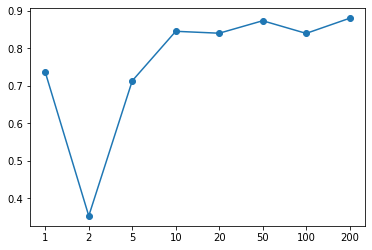


max R squared: 0.8804568944593364
Variable: Total!!Population of one race!!Black or African American Importance: 0.13
Variable: mob_workplace        Importance: 0.06
Variable: Pac Island           Importance: 0.06
Variable: mob_retail           Importance: 0.05
Variable: mob_residential      Importance: 0.05
Variable: num_hospitals_pt.1   Importance: 0.05
Variable: dem_to_rep_ratio     Importance: 0.04
Variable: All Asian            Importance: 0.04
Variable: Other Race           Importance: 0.04
Variable: X.500.gatherings     Importance: 0.03
Variable: restaurant.dine.in   Importance: 0.03
Variable: Total!!Population of one race!!American Indian and Alaska Native Importance: 0.03
Variable: mob_parks            Importance: 0.03
Variable: adult_icu_beds_pt.1  Importance: 0.03
Variable: stay.at.home         Importance: 0.02
Variable: mob_grocery          Importance: 0.02
Variable: mob_transit          Importance: 0.02
Variable: 65-74                Importance: 0.02
Variable: num_staffed

In [46]:
em_3 = data[data["label_2"]==3]
em3_X = em_3.drop(['Unnamed: 0', 'cases_total', 
       'deaths_total', 'cases_per_capita', 'deaths_per_capita',
       'case_fatality_rate', 'num_hospitals_pt',
       'num_licensed_beds_pt', 'num_staffed_beds_pt', 'num_icu_beds_pt',
       'adult_icu_beds_pt', 'pedi_icu_beds_pt',
       'potential_increase_in_bed_capac_pt', 'bed_utilization_pt',
       'avg_ventilator_usage_pt',"label", "label_2"], axis=1)
em3_y = em_3["cases_per_capita"]
X_train, X_test, y_train, y_test = train_test_split(em3_X, em3_y, test_size=0.33, random_state=66)
np.random.seed(263)
Bs = [1, 2, 5, 10, 20, 50, 100, 200]
Rsqs = []
for B in Bs:
    regressor4 = RandomForestRegressor(n_estimators=B, max_depth=10)
    regressor4.fit(X_train, y_train)
    Rsqs.append(regressor4.score(X_train, y_train))
# Make the plot
plt.plot(list(map(str, Bs)), Rsqs, "-o")
plt.show()
max_Rsq = max(Rsqs)
max_index = Rsqs.index(max_Rsq)
print("\nmax R squared:", max_Rsq)
B = Bs[max_index]
B
regressor4 = RandomForestRegressor(n_estimators=B, max_depth=10)
regressor4.fit(X_train, y_train)
preds = regressor4.predict(X_test)
feature_list = list(em3_X.columns)
# Get numerical feature importances
importances = list(regressor4.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

# Lasso regression determining the most important features

## Making list for adding all the most important features.

In [47]:
lass_import = []
np.random.seed(0)

The best hyperparameter chosen by lasso is 0.0018873918221350976.


(1e-05, 0.01)

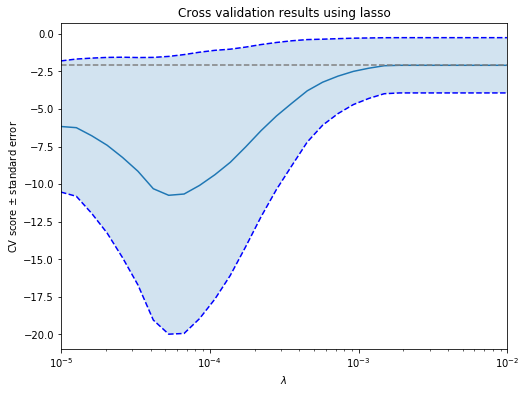

In [48]:
from sklearn.linear_model import enet_path
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import lasso_path
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

km0_X = km_0.drop(['Unnamed: 0', 'cases_total', 
       'deaths_total', 'cases_per_capita', 'deaths_per_capita',
       'case_fatality_rate', 'num_hospitals_pt',
       'num_licensed_beds_pt', 'num_staffed_beds_pt', 'num_icu_beds_pt',
       'adult_icu_beds_pt', 'pedi_icu_beds_pt',
       'potential_increase_in_bed_capac_pt', 'bed_utilization_pt',
       'avg_ventilator_usage_pt',"label", "label_2"], axis=1)
km0_y = km_0["cases_per_capita"]
X_train, X_test, y_train, y_test = train_test_split(km0_X, km0_y, test_size=0.33, random_state=66)

# 5-fold cross validation with lasso
np.random.seed(263)
lasso = Lasso(random_state=0, max_iter=100000, tol=0.001)
alphas = np.logspace(-5, -2, 30)
tuned_parameters = [{"alpha": alphas}]
n_folds = 5
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds)
clf.fit(X_train, y_train)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]
# Best hyperparameter determined by lasso
print("The best hyperparameter chosen by lasso is {}.".format(clf.best_params_["alpha"]))

# Plot the cross valiadation results
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)
# Plot error lines showing +/- standard errors of the scores
std_error = scores_std / np.sqrt(n_folds)
plt.semilogx(alphas, scores + std_error, "b--")
plt.semilogx(alphas, scores - std_error, "b--")
# Fill in
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha= 0.2)
plt.title("Cross validation results using lasso")
plt.xlabel(r"$\lambda$")
plt.ylabel(r"CV score $\pm$ standard error")
plt.axhline(np.max(scores), linestyle="--", color="0.5")
plt.xlim([alphas[0], alphas[-1]])

In [49]:
# Top 5 important features determined by lasso
lm_lasso = Lasso(alpha=clf.best_params_["alpha"])
lm_lasso.fit(X_train, y_train)
coef_dict = {}
for coef, feat in zip(lm_lasso.coef_, X_train.columns):
    coef_dict[feat] = coef
print("The most important features determined by lasso are:")
clust1km = sorted(coef_dict, key=coef_dict.get)[0:10]
print(clust1km, "And the total samples in this cluster are:", len(km0_X))
lass_import = lass_import + sorted(coef_dict, key=coef_dict.get)[0:10]

The most important features determined by lasso are:
['dem_to_rep_ratio', 'stay.at.home', 'X.50.gatherings', 'X.500.gatherings', 'public.schools', 'restaurant.dine.in', 'entertainment.gym', 'Total!!Male', 'Total!!Female', 'Total'] And the total samples in this cluster are: 95


The best hyperparameter chosen by lasso is 0.0011721022975334804.


(1e-05, 0.01)

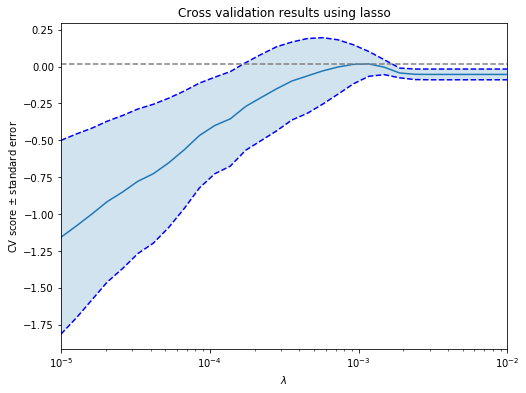

In [50]:
from sklearn.linear_model import enet_path
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import lasso_path
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

km1_X = km_1.drop(['Unnamed: 0', 'cases_total', 
       'deaths_total', 'cases_per_capita', 'deaths_per_capita',
       'case_fatality_rate', 'num_hospitals_pt',
       'num_licensed_beds_pt', 'num_staffed_beds_pt', 'num_icu_beds_pt',
       'adult_icu_beds_pt', 'pedi_icu_beds_pt',
       'potential_increase_in_bed_capac_pt', 'bed_utilization_pt',
       'avg_ventilator_usage_pt',"label", "label_2"], axis=1)
km1_y = km_1["cases_per_capita"]
X_train, X_test, y_train, y_test = train_test_split(km1_X, km1_y, test_size=0.33, random_state=66)

# 5-fold cross validation with lasso
np.random.seed(263)
lasso = Lasso(random_state=0, max_iter=100000, tol=0.001)
alphas = np.logspace(-5, -2, 30)
tuned_parameters = [{"alpha": alphas}]
n_folds = 5
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds)
clf.fit(X_train, y_train)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]
# Best hyperparameter determined by lasso
print("The best hyperparameter chosen by lasso is {}.".format(clf.best_params_["alpha"]))

# Plot the cross valiadation results
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)
# Plot error lines showing +/- standard errors of the scores
std_error = scores_std / np.sqrt(n_folds)
plt.semilogx(alphas, scores + std_error, "b--")
plt.semilogx(alphas, scores - std_error, "b--")
# Fill in
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha= 0.2)
plt.title("Cross validation results using lasso")
plt.xlabel(r"$\lambda$")
plt.ylabel(r"CV score $\pm$ standard error")
plt.axhline(np.max(scores), linestyle="--", color="0.5")
plt.xlim([alphas[0], alphas[-1]])

In [51]:
# Top 5 important features determined by lasso
lm_lasso = Lasso(alpha=clf.best_params_["alpha"])
lm_lasso.fit(X_train, y_train)
coef_dict = {}
for coef, feat in zip(lm_lasso.coef_, X_train.columns):
    coef_dict[feat] = coef
print("The most important features determined by lasso are:")
clust2km = sorted(coef_dict, key=coef_dict.get)[0:10]
print(clust2km, "And the total samples in this cluster are:", len(km1_X))
lass_import = lass_import + sorted(coef_dict, key=coef_dict.get)[0:10]

The most important features determined by lasso are:
['stay.at.home', 'X.50.gatherings', 'X.500.gatherings', 'public.schools', 'restaurant.dine.in', 'entertainment.gym', 'Total!!Male', 'Total!!Female', 'Total', 'Total!!Population of one race'] And the total samples in this cluster are: 184


The best hyperparameter chosen by lasso is 0.0008531678524172815.


(1e-05, 100.0)

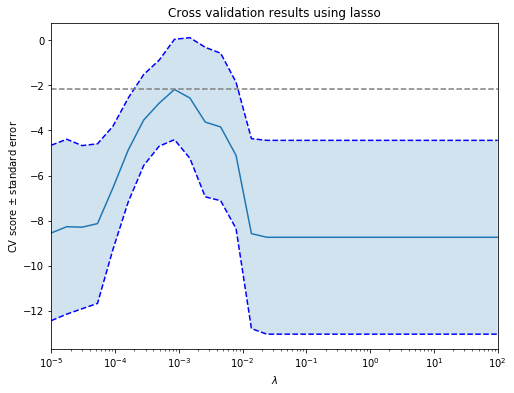

In [52]:
from sklearn.linear_model import enet_path
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import lasso_path
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

km2_X = km_2.drop(['Unnamed: 0', 'cases_total', 
       'deaths_total', 'cases_per_capita', 'deaths_per_capita',
       'case_fatality_rate', 'num_hospitals_pt',
       'num_licensed_beds_pt', 'num_staffed_beds_pt', 'num_icu_beds_pt',
       'adult_icu_beds_pt', 'pedi_icu_beds_pt',
       'potential_increase_in_bed_capac_pt', 'bed_utilization_pt',
       'avg_ventilator_usage_pt',"label", "label_2"], axis=1)
km2_y = km_2["cases_per_capita"]
X_train, X_test, y_train, y_test = train_test_split(km2_X, km2_y, test_size=0.33, random_state=66)

# 5-fold cross validation with lasso
np.random.seed(263)
lasso = Lasso(random_state=0, max_iter=100000, tol=0.001)
alphas = np.logspace(-5, 2, 30)
tuned_parameters = [{"alpha": alphas}]
n_folds = 5
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds)
clf.fit(X_train, y_train)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]
# Best hyperparameter determined by lasso
print("The best hyperparameter chosen by lasso is {}.".format(clf.best_params_["alpha"]))

# Plot the cross valiadation results
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)
# Plot error lines showing +/- standard errors of the scores
std_error = scores_std / np.sqrt(n_folds)
plt.semilogx(alphas, scores + std_error, "b--")
plt.semilogx(alphas, scores - std_error, "b--")
# Fill in
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha= 0.2)
plt.title("Cross validation results using lasso")
plt.xlabel(r"$\lambda$")
plt.ylabel(r"CV score $\pm$ standard error")
plt.axhline(np.max(scores), linestyle="--", color="0.5")
plt.xlim([alphas[0], alphas[-1]])

In [53]:
# Top 5 important features determined by lasso
lm_lasso = Lasso(alpha=clf.best_params_["alpha"])
lm_lasso.fit(X_train, y_train)
coef_dict = {}
for coef, feat in zip(lm_lasso.coef_, X_train.columns):
    coef_dict[feat] = coef
print("The most important features determined by lasso are:")
clust3km = sorted(coef_dict, key=coef_dict.get)[0:10]
print(clust3km, "And the total samples in this cluster are:", len(km2_X))
lass_import = lass_import + sorted(coef_dict, key=coef_dict.get)[0:10]

The most important features determined by lasso are:
['stay.at.home', 'X.50.gatherings', 'X.500.gatherings', 'public.schools', 'restaurant.dine.in', 'entertainment.gym', 'Total!!Male', 'Total!!Female', 'Total', 'Total!!Population of one race'] And the total samples in this cluster are: 16


The best hyperparameter chosen by lasso is 5.2983169062837125e-05.


(1e-05, 100.0)

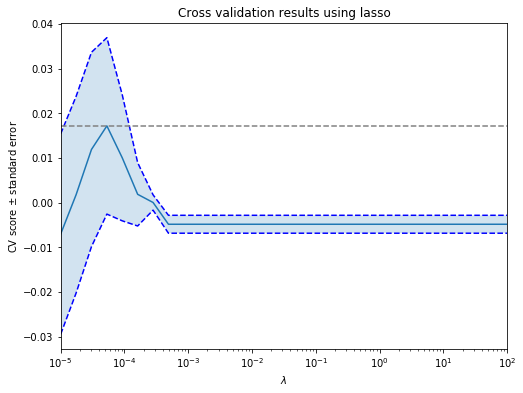

In [54]:
km3_X = km_3.drop(['Unnamed: 0', 'cases_total', 
       'deaths_total', 'cases_per_capita', 'deaths_per_capita',
       'case_fatality_rate', 'num_hospitals_pt',
       'num_licensed_beds_pt', 'num_staffed_beds_pt', 'num_icu_beds_pt',
       'adult_icu_beds_pt', 'pedi_icu_beds_pt',
       'potential_increase_in_bed_capac_pt', 'bed_utilization_pt',
       'avg_ventilator_usage_pt',"label", "label_2"], axis=1)
km3_y = km_3["cases_per_capita"]
X_train, X_test, y_train, y_test = train_test_split(km3_X, km3_y, test_size=0.33, random_state=66)

# 5-fold cross validation with lasso
np.random.seed(263)
lasso = Lasso(random_state=0, max_iter=100000, tol=0.001)
alphas = np.logspace(-5, 2, 30)
tuned_parameters = [{"alpha": alphas}]
n_folds = 5
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds)
clf.fit(X_train, y_train)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]
# Best hyperparameter determined by lasso
print("The best hyperparameter chosen by lasso is {}.".format(clf.best_params_["alpha"]))

# Plot the cross valiadation results
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)
# Plot error lines showing +/- standard errors of the scores
std_error = scores_std / np.sqrt(n_folds)
plt.semilogx(alphas, scores + std_error, "b--")
plt.semilogx(alphas, scores - std_error, "b--")
# Fill in
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha= 0.2)
plt.title("Cross validation results using lasso")
plt.xlabel(r"$\lambda$")
plt.ylabel(r"CV score $\pm$ standard error")
plt.axhline(np.max(scores), linestyle="--", color="0.5")
plt.xlim([alphas[0], alphas[-1]])

In [55]:
lm_lasso = Lasso(alpha=clf.best_params_["alpha"])
lm_lasso.fit(X_train, y_train)
coef_dict = {}
for coef, feat in zip(lm_lasso.coef_, X_train.columns):
    coef_dict[feat] = coef
print("The most important features determined by lasso are:")
clust4km = sorted(coef_dict, key=coef_dict.get)[0:10]
print(clust4km, "And the total samples in this cluster are:", len(km3_X))
lass_import = lass_import + sorted(coef_dict, key=coef_dict.get)[0:10]

The most important features determined by lasso are:
['X.500.gatherings', 'potential_increase_in_bed_capac_pt.1', 'pedi_icu_beds_pt.1', 'entertainment.gym', 'stay.at.home', 'X.50.gatherings', 'restaurant.dine.in', 'Total!!Male', 'Total!!Female', 'Total'] And the total samples in this cluster are: 732


The best hyperparameter chosen by lasso is 0.00017433288221999874.


(1e-05, 0.01)

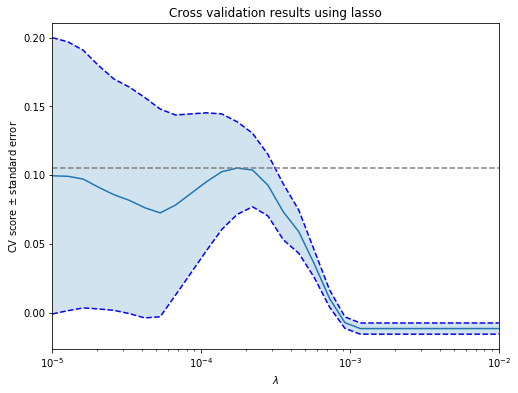

In [56]:
X_train, X_test, y_train, y_test = train_test_split(full_X, full_y, test_size=0.33, random_state=66)

# 5-fold cross validation with lasso
np.random.seed(263)
lasso = Lasso(random_state=0, max_iter=100000, tol=0.001)
alphas = np.logspace(-5, -2, 30)
tuned_parameters = [{"alpha": alphas}]
n_folds = 5
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds)
clf.fit(X_train, y_train)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]
# Best hyperparameter determined by lasso
print("The best hyperparameter chosen by lasso is {}.".format(clf.best_params_["alpha"]))

# Plot the cross valiadation results
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)
# Plot error lines showing +/- standard errors of the scores
std_error = scores_std / np.sqrt(n_folds)
plt.semilogx(alphas, scores + std_error, "b--")
plt.semilogx(alphas, scores - std_error, "b--")
# Fill in
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha= 0.2)
plt.title("Cross validation results using lasso")
plt.xlabel(r"$\lambda$")
plt.ylabel(r"CV score $\pm$ standard error")
plt.axhline(np.max(scores), linestyle="--", color="0.5")
plt.xlim([alphas[0], alphas[-1]])

In [57]:
# Top 5 important features determined by lasso
lm_lasso = Lasso(alpha=0.00010826367338740541)
lm_lasso.fit(X_train, y_train)
coef_dict = {}
for coef, feat in zip(lm_lasso.coef_, X_train.columns):
    coef_dict[feat] = coef
print("The most important features determined by lasso are:")
allkm = sorted(coef_dict, key=coef_dict.get)[0:10]
print(allkm, "And the total samples in this cluster are:", len(full_X))

The most important features determined by lasso are:
['Pac Island', 'entertainment.gym', 'X.500.gatherings', 'stay.at.home', 'X.50.gatherings', 'avg_ventilator_usage_pt.1', 'restaurant.dine.in', 'Total!!Male', 'Total!!Female', 'Total'] And the total samples in this cluster are: 1027


In [58]:
#print(km_1.describe())
#import treeinterpreter

In [59]:
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

In [60]:
base_imp = imp_df(X_train.columns, regressor1.feature_importances_)
#base_imp

In [61]:
#X_train, X_test, y_train, y_test = train_test_split(km0_X, km0_y, test_size=0.33, random_state=66)

In [62]:
def getDuplicatesWithCount(listOfElems):
    ''' Get frequency count of duplicate elements in the given list '''
    dictOfElems = dict()
    # Iterate over each element in list
    for elem in listOfElems:
        # If element exists in dict then increment its value else add it in dict
        if elem in dictOfElems:
            dictOfElems[elem] += 1
        else:
            dictOfElems[elem] = 1    
 
    # Filter key-value pairs in dictionary. Keep pairs whose value is greater than 1 i.e. only duplicate elements from list.
    dictOfElems = { key:value for key, value in dictOfElems.items() if value >= 1}
    # Returns a dict of duplicate elements and thier frequency count
    return dictOfElems

dictOfElems = getDuplicatesWithCount(lass_import)     
 
for key, value in dictOfElems.items():
        print(key , ' : ', value)

dem_to_rep_ratio  :  1
stay.at.home  :  4
X.50.gatherings  :  4
X.500.gatherings  :  4
public.schools  :  3
restaurant.dine.in  :  4
entertainment.gym  :  4
Total!!Male  :  4
Total!!Female  :  4
Total  :  4
Total!!Population of one race  :  2
potential_increase_in_bed_capac_pt.1  :  1
pedi_icu_beds_pt.1  :  1


# Running the Kmeans for clusters: 3

In [106]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from sklearn.mixture import GaussianMixture

In [107]:
data = pd.read_csv('FinalDataframe_3.csv')

In [108]:
## have to also drop na
data = data.dropna()

In [109]:
asian = data[['Total!!Population of one race!!Asian',
       'Total!!Population of one race!!Asian!!Asian Indian',
       'Total!!Population of one race!!Asian!!Chinese (including Taiwanese)',
       'Total!!Population of one race!!Asian!!Filipino',
       'Total!!Population of one race!!Asian!!Japanese',
       'Total!!Population of one race!!Asian!!Korean',
       'Total!!Population of one race!!Asian!!Vietnamese',
       'Total!!Population of one race!!Asian!!Other Asian']]
data['All Asian'] = asian.mean(axis=1, skipna=True)
data = data.drop(columns = ['Total!!Population of one race!!Asian',
       'Total!!Population of one race!!Asian!!Asian Indian',
       'Total!!Population of one race!!Asian!!Chinese (including Taiwanese)',
       'Total!!Population of one race!!Asian!!Filipino',
       'Total!!Population of one race!!Asian!!Japanese',
       'Total!!Population of one race!!Asian!!Korean',
       'Total!!Population of one race!!Asian!!Vietnamese',
       'Total!!Population of one race!!Asian!!Other Asian'])

data['Pac Island'] = data[['Total!!Population of one race!!Native Hawaiian and Other Pacific Islander',
       'Total!!Population of one race!!Native Hawaiian and Other Pacific Islander!!Native Hawaiian',
       'Total!!Population of one race!!Native Hawaiian and Other Pacific Islander!!Guamanian or Chamorro',
       'Total!!Population of one race!!Native Hawaiian and Other Pacific Islander!!Samoan',
       'Total!!Population of one race!!Native Hawaiian and Other Pacific Islander!!Other Pacific Islander']].mean(axis=1, skipna=True)
data = data.drop(columns = ['Total!!Population of one race!!Native Hawaiian and Other Pacific Islander',
       'Total!!Population of one race!!Native Hawaiian and Other Pacific Islander!!Native Hawaiian',
       'Total!!Population of one race!!Native Hawaiian and Other Pacific Islander!!Guamanian or Chamorro',
       'Total!!Population of one race!!Native Hawaiian and Other Pacific Islander!!Samoan',
       'Total!!Population of one race!!Native Hawaiian and Other Pacific Islander!!Other Pacific Islander'])

data['Other Race'] = data[['Total!!Population of one race!!Some Other Race',
       'Total!!Population of Two or More Races',
       'Total!!Population of Two or More Races!!White; American Indian and Alaska Native',
       'Total!!Population of Two or More Races!!White; Asian',
       'Total!!Population of Two or More Races!!White; Black or African American',
       'Total!!Population of Two or More Races!!White; Some Other Race']].mean(axis=1, skipna=True)
data = data.drop(columns = ['Total!!Population of one race!!Some Other Race',
       'Total!!Population of Two or More Races',
       'Total!!Population of Two or More Races!!White; American Indian and Alaska Native',
       'Total!!Population of Two or More Races!!White; Asian',
       'Total!!Population of Two or More Races!!White; Black or African American',
       'Total!!Population of Two or More Races!!White; Some Other Race'])

# build per capita 

In [110]:
data['num_hospitals_pt'] = data['num_hospitals'] / data['Total']
data['num_licensed_beds_pt'] = data['num_licensed_beds'] / data['Total']
data['num_staffed_beds_pt'] = data['num_staffed_beds'] / data['Total']
data['num_icu_beds_pt'] = data['num_icu_beds'] / data['Total']
data['adult_icu_beds_pt'] = data['adult_icu_beds'] / data['Total']
data['pedi_icu_beds_pt'] = data['pedi_icu_beds'] / data['Total']
data['potential_increase_in_bed_capac_pt'] = data['potential_increase_in_bed_capac'] / data['Total']
data['bed_utilization_pt'] = data['bed_utilization'] / data['Total']
data['avg_ventilator_usage_pt'] = data['avg_ventilator_usage'] / data['Total']

In [111]:
#for X, or what we're clustering, we are removing outcomes y, such as case and death totals
#Also removing strings; can't k-means cluster on these
#Also removing columns Unnamed, they seem to be artifacts from data cleaning/combining multiple datasets?
X = data.drop(['Unnamed: 0', 'Unnamed: 0.1','NAME',  'cases_total', 'fips_final',
       'deaths_total', 'cases_per_capita', 'deaths_per_capita',
       'case_fatality_rate', 'Unnamed: 0.1.1', 'county', 'population','STATEFP', 'COUNTYFP',
       'CountyName', 'StateName', 'State','num_hospitals', 'num_licensed_beds','num_staffed_beds','num_icu_beds',
        'adult_icu_beds','pedi_icu_beds', 'potential_increase_in_bed_capac','bed_utilization','avg_ventilator_usage',
         'federal.guidelines',   'foreign.travel.ban'  ], axis=1)
y = data[["cases_total", "deaths_total", "cases_per_capita", "deaths_per_capita", "case_fatality_rate"]]

In [121]:
#set number of clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_n)

#Run the clustering algorithm
model = kmeans.fit(X_n)
model

#Generate cluster predictions and store in y_hat
y_hat = kmeans.predict(X_n)

#function that creates a dataframe with a column for cluster number
cluster_centers = kmeans.cluster_centers_

def kmean_col(X, cluster_centers):
        cols = list(X)
        cols.append('cluster')
        
# Zip with a column called 'cluster' (index)
        Z = [np.append(A, index) for index, A in enumerate(cluster_centers)]
    
# Convert to pandas data frame for plotting
        P = pd.DataFrame(Z, columns=cols)
        P['cluster'] = P['cluster'].astype(int)
        return P
    
P = kmean_col(X_n, cluster_centers)
P

,dem_to_rep_ratio,stay.at.home,X.50.gatherings,X.500.gatherings,public.schools,restaurant.dine.in,entertainment.gym,Total!!Male,Total!!Female,Total,...,num_staffed_beds_pt,num_icu_beds_pt,adult_icu_beds_pt,pedi_icu_beds_pt,potential_increase_in_bed_capac_pt,bed_utilization_pt,avg_ventilator_usage_pt,label_2,label,cluster
0,-0.250550,0.104236,0.087624,0.055623,0.002374,0.080104,0.107220,-0.346486,-0.348362,-0.347495,...,-0.188867,-0.117752,-0.117752,-0.359427,-0.027916,0.158242,0.214381,2.484890,0.032967,0
1,1.371737,-0.826346,-0.124767,-0.119798,0.373038,-0.318761,-0.552175,5.838073,5.806225,5.822667,...,0.148023,0.104698,0.104698,0.852632,-0.204641,-0.493808,-0.903419,1.875000,1.000000,1
2,0.566971,-0.221421,-0.218352,-0.136313,-0.027198,-0.188040,-0.244599,0.561247,0.567873,0.564712,...,0.477479,0.296990,0.296990,0.876398,0.083382,-0.379150,-0.500404,0.272085,2.000000,2


In [122]:
X_n['label'] = kmeans.labels_ # result for K-means
whole = pd.concat([X_n, y], axis=1)

counts_1 = X_n['label'].value_counts() # kmeans
counts_1

0    728
2    283
1     16
Name: label, dtype: int64

In [64]:
from sklearn.linear_model import enet_path
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import lasso_path
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

X = data.drop(['Unnamed: 0', 'cases_total', 
       'deaths_total', 'cases_per_capita', 'deaths_per_capita',
       'case_fatality_rate', 'num_hospitals_pt',
       'num_licensed_beds_pt', 'num_staffed_beds_pt', 'num_icu_beds_pt',
       'adult_icu_beds_pt', 'pedi_icu_beds_pt',
       'potential_increase_in_bed_capac_pt', 'bed_utilization_pt',
       'avg_ventilator_usage_pt',"label", "label_2"], axis=1)
Y = data['cases_per_capita']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=66)

# 5-fold cross validation with lasso
np.random.seed(263)
lasso = Lasso(random_state=0, max_iter=100000, tol=0.0000001)
alphas = np.logspace(-5, -2, 30)
tuned_parameters = [{"alpha": alphas}]
n_folds = 5
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds)
clf.fit(X_train, y_train)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]
# Best hyperparameter determined by lasso
print("The best hyperparameter chosen by lasso is {}.".format(clf.best_params_["alpha"]))

The best hyperparameter chosen by lasso is 0.00010826367338740541.


/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.141623627228891e-06, tolerance: 1.903562646198679e-06
  tol, rng, random, positive)
/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.9211491797581e-06, tolerance: 1.903562646198679e-06
  tol, rng, random, positive)
/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2809710172236033e-05, tolerance: 1.903562646198679e-06
  tol, rng, random, positive)
/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/li

/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005971598183374931, tolerance: 1.903562646198679e-06
  tol, rng, random, positive)
/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007415200964451356, tolerance: 1.903562646198679e-06
  tol, rng, random, positive)
/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008882067006269097, tolerance: 1.903562646198679e-06
  tol, rng, random, positive)
/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/l

/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004885244761507606, tolerance: 1.903562646198679e-06
  tol, rng, random, positive)
/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004957269047935325, tolerance: 1.903562646198679e-06
  tol, rng, random, positive)
/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005027851337323087, tolerance: 1.903562646198679e-06
  tol, rng, random, positive)
/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/line

/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0065843732252846825, tolerance: 1.903562646198679e-06
  tol, rng, random, positive)
/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006612094229015312, tolerance: 1.903562646198679e-06
  tol, rng, random, positive)
/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0066394017359888554, tolerance: 1.903562646198679e-06
  tol, rng, random, positive)
/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/li

/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007160972549395876, tolerance: 1.903562646198679e-06
  tol, rng, random, positive)
/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007174816582488898, tolerance: 1.903562646198679e-06
  tol, rng, random, positive)
/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007188323098282946, tolerance: 1.903562646198679e-06
  tol, rng, random, positive)
/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/line

/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007630637738576553, tolerance: 1.903562646198679e-06
  tol, rng, random, positive)
/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007633706354833132, tolerance: 1.903562646198679e-06
  tol, rng, random, positive)
/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007636701184019867, tolerance: 1.903562646198679e-06
  tol, rng, random, positive)
/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/line

/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007701342350913148, tolerance: 1.903562646198679e-06
  tol, rng, random, positive)
/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007702589531420113, tolerance: 1.903562646198679e-06
  tol, rng, random, positive)
/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007703800012190019, tolerance: 1.903562646198679e-06
  tol, rng, random, positive)
/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/line

/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007730568111289231, tolerance: 1.903562646198679e-06
  tol, rng, random, positive)
/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007730598661151961, tolerance: 1.903562646198679e-06
  tol, rng, random, positive)
/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00773061697472732, tolerance: 1.903562646198679e-06
  tol, rng, random, positive)
/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linea

/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007709574144127887, tolerance: 1.903562646198679e-06
  tol, rng, random, positive)
/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007709138104894007, tolerance: 1.903562646198679e-06
  tol, rng, random, positive)
/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007708700129134177, tolerance: 1.903562646198679e-06
  tol, rng, random, positive)
/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/line

/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007687727937432386, tolerance: 1.903562646198679e-06
  tol, rng, random, positive)
/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0076872469645894274, tolerance: 1.903562646198679e-06
  tol, rng, random, positive)
/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007686765794055277, tolerance: 1.903562646198679e-06
  tol, rng, random, positive)
/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/lin

/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007651289266810178, tolerance: 1.903562646198679e-06
  tol, rng, random, positive)
/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007650834999832963, tolerance: 1.903562646198679e-06
  tol, rng, random, positive)
/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007650381405321143, tolerance: 1.903562646198679e-06
  tol, rng, random, positive)
/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/line

/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007617675606650802, tolerance: 1.903562646198679e-06
  tol, rng, random, positive)
/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007617281007751155, tolerance: 1.903562646198679e-06
  tol, rng, random, positive)
/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007616887190590765, tolerance: 1.903562646198679e-06
  tol, rng, random, positive)
/Users/PFarnsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/line

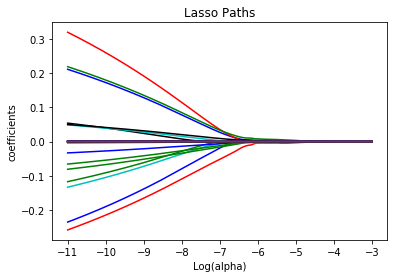

In [82]:
# First we import the necessary packages:
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import enet_path, lasso_path

eps = .00000001

alphas_lasso, coefs_lasso, _ = enet_path(
    X, Y, n_alphas = 1000, eps = eps, l1_ratio=1., fit_intercept=False)

plt.figure(1)
colors = cycle(['b', 'r', 'g', 'c', 'k'])
neg_log_alphas_lasso = np.log10(alphas_lasso)
for coef_l, c in zip(coefs_lasso, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
#    l2 = plt.plot(neg_log_alphas_ridge, coef_e, linestyle='--', c=c)

plt.xlabel('Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso Paths')
plt.axis('tight')
plt.show()

In [83]:
len(coefs_lasso)

# Top 30 important features determined by lasso
lm_lasso = Lasso(alpha=0.00010826367338740541)
lm_lasso.fit(X_train, y_train)
coef_dict = {}
for coef, feat in zip(lm_lasso.coef_, X_train.columns):
    coef_dict[feat] = coef
print("The most important features determined by lasso are:")
allkm = sorted(coef_dict, key=coef_dict.get)[0:30]
print(allkm, "And the total samples in this cluster are:", len(X))

The most important features determined by lasso are:
['Pac Island', 'X.50.gatherings', 'stay.at.home', 'entertainment.gym', 'X.500.gatherings', 'avg_ventilator_usage_pt.1', 'mob_retail', 'public.schools', 'restaurant.dine.in', 'Total!!Male', 'Total!!Female', 'Total', 'Total!!Population of one race', 'Total!!Population of one race!!White', 'Total!!Population of one race!!Black or African American', 'Total!!Population of one race!!American Indian and Alaska Native', 'mob_grocery', 'mob_parks', 'mob_transit', 'mob_workplace', '0-17', '18-44', '45-64', '65-74', 'Other Race', 'num_hospitals_pt.1', 'num_licensed_beds_pt.1', 'num_staffed_beds_pt.1', 'num_icu_beds_pt.1', 'adult_icu_beds_pt.1'] And the total samples in this cluster are: 1027


In [101]:
allkm = list(allkm)
data = data[data.columns & allkm]

In [105]:
data

,stay.at.home,X.50.gatherings,X.500.gatherings,public.schools,restaurant.dine.in,entertainment.gym,Total!!Male,Total!!Female,Total,Total!!Population of one race,...,45-64,65-74,Pac Island,Other Race,num_hospitals_pt.1,num_licensed_beds_pt.1,num_staffed_beds_pt.1,num_icu_beds_pt.1,adult_icu_beds_pt.1,avg_ventilator_usage_pt.1
0,1.389090,-0.175407,-1.090803,-0.846132,0.169535,1.645564,-0.046878,-0.044805,-0.045827,-0.039710,...,-0.013227,0.166067,-0.136632,-0.198224,-0.295633,-0.368365,-0.228826,-0.015193,-0.015193,-0.737095
1,1.389090,-0.175407,-1.090803,-0.846132,0.169535,1.645564,-0.460164,-0.469788,-0.465145,-0.466124,...,-0.487020,-0.504940,-0.207486,-0.325728,0.152923,-0.653126,-0.764545,-0.489232,-0.489232,-0.058992
2,1.389090,-0.175407,-1.090803,-0.846132,0.169535,1.645564,-0.373842,-0.375230,-0.374605,-0.373880,...,-0.390453,-0.364897,-0.184179,-0.277180,-0.388696,-1.179445,-1.156463,-0.803982,-0.803982,-0.240605
3,1.389090,-0.175407,-1.090803,-0.846132,0.169535,1.645564,-0.473402,-0.467236,-0.470323,-0.471360,...,-0.490323,-0.500517,-0.213080,-0.328999,0.237699,0.268017,-0.160348,0.229650,0.229650,1.017112
4,1.389090,-0.175407,-1.090803,-0.846132,0.169535,1.645564,-0.218976,-0.208051,-0.213430,-0.210855,...,-0.215567,-0.183040,-0.130107,-0.249291,-0.226262,0.587078,0.778140,-0.135901,-0.135901,-0.089529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,0.033195,-0.175407,0.359231,1.011650,0.169535,-0.272462,-0.418623,-0.420932,-0.419863,-0.421862,...,-0.433428,-0.441094,-0.210283,-0.294177,-0.234072,0.365233,0.566368,0.071585,0.071585,0.069859
1023,0.033195,-0.175407,0.359231,1.011650,0.169535,-0.272462,-0.502818,-0.502825,-0.502895,-0.504833,...,-0.522992,-0.539951,-0.219606,-0.330517,1.663590,0.017336,0.119056,0.826946,0.826946,1.457618
1024,0.033195,-0.175407,0.359231,1.011650,0.169535,-0.272462,-0.279715,-0.288110,-0.284042,-0.286088,...,-0.287940,-0.308061,-0.087222,-0.199742,-0.524020,-0.306760,-0.308433,-0.538994,-0.538994,-0.059762
1025,0.033195,-0.175407,0.359231,1.011650,0.169535,-0.272462,-0.476283,-0.479116,-0.477799,-0.479251,...,-0.497534,-0.519587,-0.215876,-0.322238,1.534584,-0.377550,-0.260580,0.714549,0.714549,1.328104
